In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, Model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
'''
a. Get the data:
'''
# Load the dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Create dictionaries for unsupervised and supervised data
unsupervised_jungyu = {'images': X_train_full[:60000]}
supervised_jungyu = {'images': X_test[:10000], 'labels': y_test[:10000]}

In [3]:
'''
b. Data Pre-preprocessing
'''
# Normalize pixel values to the range 0-1
unsupervised_jungyu['images'] = unsupervised_jungyu['images'].astype('float32') / 255.0
supervised_jungyu['images'] = supervised_jungyu['images'].astype('float32') / 255.0

# One-hot encode the labels
supervised_jungyu['labels'] = to_categorical(supervised_jungyu['labels'], num_classes=10)

# Display the shapes
print("Unsupervised images shape:", unsupervised_jungyu['images'].shape)
print("Supervised images shape:", supervised_jungyu['images'].shape)
print("Supervised labels shape:", supervised_jungyu['labels'].shape)

Unsupervised images shape: (60000, 28, 28)
Supervised images shape: (10000, 28, 28)
Supervised labels shape: (10000, 10)


In [4]:
'''
c. Data Preparation (Training, Validation, Testing)
'''
# Set the random seed based on the last two digits of your student ID
random_seed = 21


# 1. Split unsupervised dataset into training (57,000) and validation (3,000)
unsupervised_train_jungyu, unsupervised_val_jungyu = train_test_split(
    unsupervised_jungyu['images'], test_size=3000, train_size=57000, random_state=random_seed
)

# 2. Discard 7,000 samples from the supervised dataset
supervised_images, _, supervised_labels, _ = train_test_split(
    supervised_jungyu['images'], supervised_jungyu['labels'], test_size=7000, random_state=random_seed
)

# 3. Split the remaining supervised dataset into training (1800), validation (600), and testing (600)
x_train_jungyu, x_temp_jungyu, y_train_jungyu, y_temp_jungyu = train_test_split(
    supervised_images, supervised_labels, train_size=1800, random_state=random_seed
)
x_val_jungyu, x_test_jungyu, y_val_jungyu, y_test_jungyu = train_test_split(
    x_temp_jungyu, y_temp_jungyu, train_size=600, test_size=600, random_state=random_seed
)

# 4. Display the shapes
print("Unsupervised training images shape:", unsupervised_train_jungyu.shape)
print("Unsupervised validation images shape:", unsupervised_val_jungyu.shape)
print("Supervised training images shape:", x_train_jungyu.shape)
print("Supervised validation images shape:", x_val_jungyu.shape)
print("Supervised test images shape:", x_test_jungyu.shape)
print("Supervised training labels shape:", y_train_jungyu.shape)
print("Supervised validation labels shape:", y_val_jungyu.shape)
print("Supervised test labels shape:", y_test_jungyu.shape)

Unsupervised training images shape: (57000, 28, 28)
Unsupervised validation images shape: (3000, 28, 28)
Supervised training images shape: (1800, 28, 28)
Supervised validation images shape: (600, 28, 28)
Supervised test images shape: (600, 28, 28)
Supervised training labels shape: (1800, 10)
Supervised validation labels shape: (600, 10)
Supervised test labels shape: (600, 10)


In [5]:
''' 
d. Build, Train, and Validate a baseline CNN Model
'''
# Build the CNN model
cnn_v1_model_jungyu = models.Sequential()

# Input layer based on the Fashion MNIST dataset (28x28 grayscale images)
cnn_v1_model_jungyu.add(layers.Input(shape=(28, 28, 1)))

# 1st Convolutional layer: 16 filters, 3x3 window, 'relu' activation, 'same' padding, stride 2
cnn_v1_model_jungyu.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))

# 2nd Convolutional layer: 8 filters, 3x3 window, 'relu' activation, 'same' padding, stride 2
cnn_v1_model_jungyu.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))

# Flatten layer to convert 2D output to 1D for fully connected layer
cnn_v1_model_jungyu.add(layers.Flatten())

# Fully connected layer with 100 neurons
cnn_v1_model_jungyu.add(layers.Dense(100, activation='relu'))

# Output layer with 10 neurons (corresponding to 10 classes) and softmax activation
cnn_v1_model_jungyu.add(layers.Dense(10, activation='softmax'))

# Compile the model with adam optimizer, categorical crossentropy loss function, and accuracy metric
cnn_v1_model_jungyu.compile(optimizer='adam', 
                            loss='categorical_crossentropy', 
                            metrics=['accuracy'])

In [6]:
# Print the summary of the model
cnn_v1_model_jungyu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 100)               39300     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (162.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the CNN model
cnn_v1_history_jungyu = cnn_v1_model_jungyu.fit(
    x_train_jungyu, y_train_jungyu, 
    epochs=10, batch_size=256, 
    validation_data=(x_val_jungyu, y_val_jungyu)
)

Epoch 1/10


8/8 [==============================] - 1s 32ms/step - loss: 2.2531 - accuracy: 0.2422 - val_loss: 2.1457 - val_accuracy: 0.3500
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 2.0611 - accuracy: 0.3656 - val_loss: 1.8763 - val_accuracy: 0.4967
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 1.7398 - accuracy: 0.5817 - val_loss: 1.4600 - val_accuracy: 0.6017
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 1.3238 - accuracy: 0.6194 - val_loss: 1.0758 - val_accuracy: 0.6267
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 1.0257 - accuracy: 0.6456 - val_loss: 0.8896 - val_accuracy: 0.6883
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.9107 - accuracy: 0.6950 - val_loss: 0.8312 - val_accuracy: 0.6883
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.8567 - accuracy: 0.6783 - val_loss: 0.7985 - val_accuracy: 0.7267
Epoch 8/10
8/8 [===========

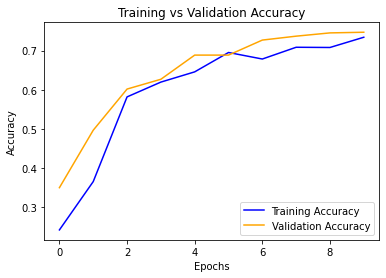

In [10]:
'''
e. Test and analyze the baseline model
'''
# Plot training vs validation accuracy
plt.plot(cnn_v1_history_jungyu.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(cnn_v1_history_jungyu.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_v1_model_jungyu.evaluate(x_test_jungyu, y_test_jungyu)

print(f"Test Accuracy: {test_accuracy}")

19/19 [==============================] - 0s 2ms/step - loss: 0.7686 - accuracy: 0.7367
Test Accuracy: 0.7366666793823242


In [12]:
# Make predictions on the test dataset
cnn_predictions_jungyu = cnn_v1_model_jungyu.predict(x_test_jungyu)

19/19 [==============================] - 0s 1ms/step


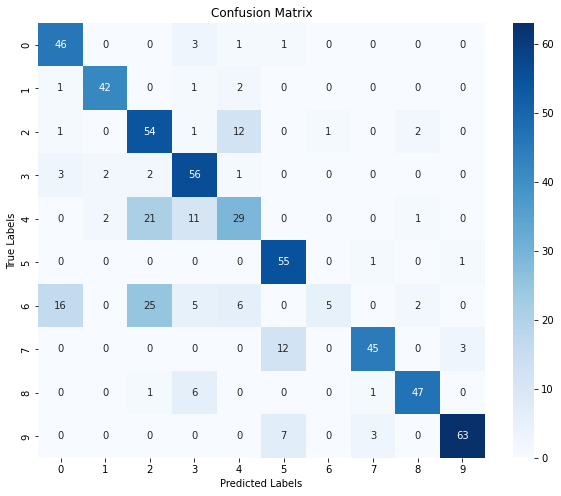

In [15]:
# Convert predictions from probabilities to class labels
cnn_predictions_labels = np.argmax(cnn_predictions_jungyu, axis=1)
y_test_labels = np.argmax(y_test_jungyu, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, cnn_predictions_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

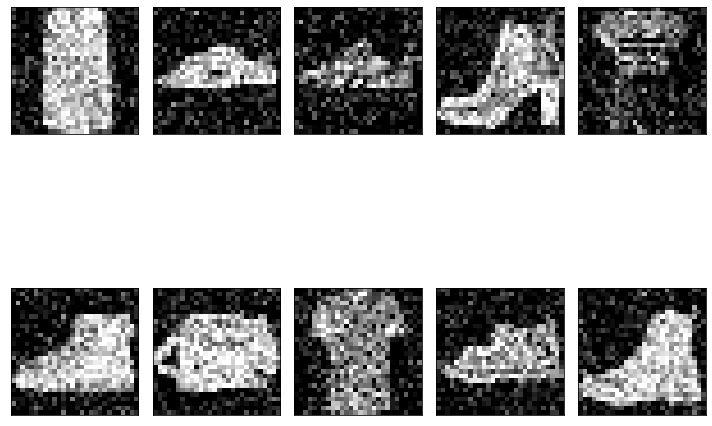

In [20]:
'''
f. Add random noise to unsupervised dataset
'''
# Add random noise to the unsupervised training and validation dataset
noise_factor = 0.2
random_seed = 21

# Add noise to training data
x_train_noisy_jungyu = unsupervised_train_jungyu + noise_factor * tf.random.normal(shape=unsupervised_train_jungyu.shape, seed=random_seed)
x_val_noisy_jungyu = unsupervised_val_jungyu + noise_factor * tf.random.normal(shape=unsupervised_val_jungyu.shape, seed=random_seed)

# Clip the values to be within 0 and 1
x_train_noisy_jungyu = tf.clip_by_value(x_train_noisy_jungyu, clip_value_min=0.0, clip_value_max=1.0)
x_val_noisy_jungyu = tf.clip_by_value(x_val_noisy_jungyu, clip_value_min=0.0, clip_value_max=1.0)

# Plot the first 10 noisy validation images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val_noisy_jungyu[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

In [22]:
'''
g. Build and pretrain Autoencoder
'''
# Input layer based on the image size of Fashion MNIST (28x28, 1 channel)
inputs_jungyu = layers.Input(shape=(28, 28, 1))

# Encoder Section (store layers as e_jungyu)
e_jungyu = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(inputs_jungyu)
e_jungyu = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(e_jungyu)

# Decoder Section (store layers as d_jungyu)
d_jungyu = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same', strides=2)(e_jungyu)
d_jungyu = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(d_jungyu)
outputs_jungyu = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d_jungyu)

# Create the Autoencoder model
autoencoder_jungyu = Model(inputs_jungyu, outputs_jungyu)

In [23]:
# Compile the autoencoder model with 'adam' optimizer and 'mean squared error' loss function
autoencoder_jungyu.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Print the summary of the autoencoder model
autoencoder_jungyu.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145   

In [25]:
# Train the autoencoder using the noisy images as input and original images as output
autoencoder_history_jungyu = autoencoder_jungyu.fit(
    x_train_noisy_jungyu, unsupervised_train_jungyu, 
    epochs=10, batch_size=256, 
    shuffle=True, 
    validation_data=(x_val_noisy_jungyu, unsupervised_val_jungyu)
)

Epoch 1/10
223/223 [==============================] - 5s 18ms/step - loss: 0.0542 - val_loss: 0.0166
Epoch 2/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0146 - val_loss: 0.0133
Epoch 3/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0127 - val_loss: 0.0121
Epoch 4/10
223/223 [==============================] - 4s 18ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 5/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 6/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0109 - val_loss: 0.0107
Epoch 7/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0106 - val_loss: 0.0104
Epoch 8/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 9/10
223/223 [==============================] - 4s 17ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 10/10
223/223 [==============================] - 4s 18ms/step - loss: 0.0100 - val_lo

In [26]:
# Create predictions on the unsupervised validation dataset
autoencoder_predictions_jungyu = autoencoder_jungyu.predict(x_val_noisy_jungyu)

94/94 [==============================] - 0s 2ms/step


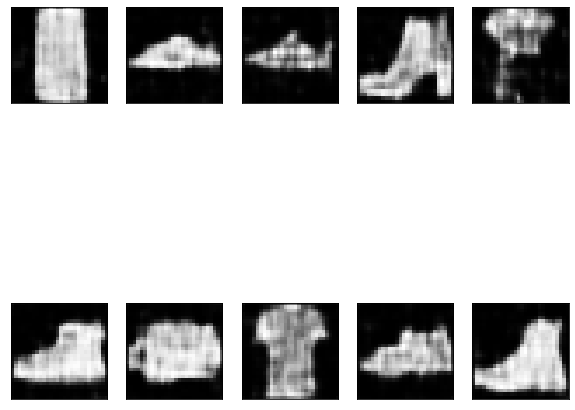

In [27]:
# Plot the first 10 predicted images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.mean(autoencoder_predictions_jungyu[i], axis=-1), cmap='gray')  # Remove third axis
    plt.xticks([])
    plt.yticks([])
plt.show()

In [28]:
'''
h. Build and perform transfer learning on a CNN with the Autoencoder
'''

# Use the encoder section from the pre-trained autoencoder
encoded_input_jungyu = inputs_jungyu  # Input layer from autoencoder
encoded_output_jungyu = e_jungyu      # Encoder layers from the autoencoder

# Add a flatten layer to prepare for the fully connected layer
flatten_jungyu = layers.Flatten()(encoded_output_jungyu)

# Fully connected layer with 100 neurons
dense_jungyu = layers.Dense(100, activation='relu')(flatten_jungyu)

# Output layer with 10 neurons (as there are 10 classes in Fashion MNIST) and softmax activation
output_jungyu = layers.Dense(10, activation='softmax')(dense_jungyu)

# Build the CNN model using the transferred encoder and new layers
cnn_v2_jungyu = Model(inputs=encoded_input_jungyu, outputs=output_jungyu)

In [29]:
cnn_v2_jungyu.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [30]:
cnn_v2_jungyu.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               39300     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 41630 (162.62 KB)
Trainable params: 41630 (16

In [31]:
cnn_v2_history_jungyu = cnn_v2_jungyu.fit(
    x_train_jungyu, y_train_jungyu, 
    epochs=10, batch_size=256, 
    validation_data=(x_val_jungyu, y_val_jungyu)
)

Epoch 1/10
8/8 [==============================] - 1s 27ms/step - loss: 3.0925 - accuracy: 0.1294 - val_loss: 2.5951 - val_accuracy: 0.1500
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 2.0235 - accuracy: 0.2828 - val_loss: 1.6904 - val_accuracy: 0.4633
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 1.6556 - accuracy: 0.4067 - val_loss: 1.3887 - val_accuracy: 0.4967
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 1.3589 - accuracy: 0.5083 - val_loss: 1.2276 - val_accuracy: 0.5633
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 1.1481 - accuracy: 0.5994 - val_loss: 1.0203 - val_accuracy: 0.6267
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 1.0551 - accuracy: 0.5994 - val_loss: 1.0487 - val_accuracy: 0.5667
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 1.0239 - accuracy: 0.6033 - val_loss: 0.8906 - val_accuracy: 0.6533
Epoch 8/10
8/8 [=============

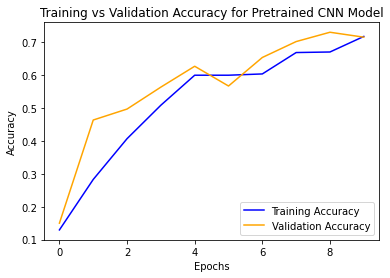

In [33]:
'''
i. Test and analyze the pretrained CNN model
'''
# Plot training vs validation accuracy for the pretrained CNN model
plt.plot(cnn_v2_history_jungyu.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(cnn_v2_history_jungyu.history['val_accuracy'], label='Validation Accuracy', color='orange')

plt.title('Training vs Validation Accuracy for Pretrained CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [35]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn_v2_jungyu.evaluate(x_test_jungyu, y_test_jungyu)

print(f"Test Accuracy: {test_accuracy}")

19/19 [==============================] - 0s 1ms/step - loss: 0.7970 - accuracy: 0.7033
Test Accuracy: 0.70333331823349


In [36]:
# Make predictions on the test dataset
cnn_predictions_jungyu = cnn_v2_jungyu.predict(x_test_jungyu)

19/19 [==============================] - 0s 1ms/step


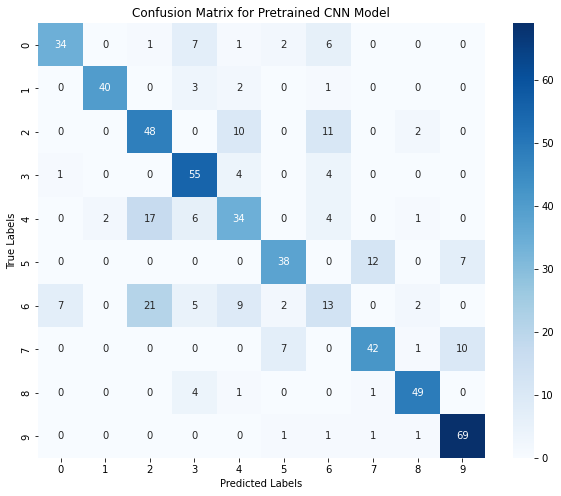

In [37]:
# Convert predictions from probabilities to class labels
cnn_predictions_labels = np.argmax(cnn_predictions_jungyu, axis=1)
y_test_labels = np.argmax(y_test_jungyu, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, cnn_predictions_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix for Pretrained CNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

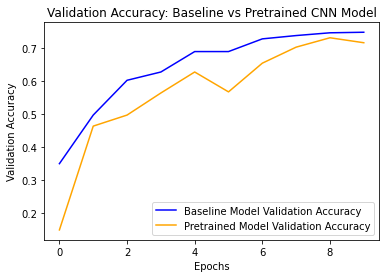

In [38]:
'''
j. Compare the performance of the baseline CNN model to the pretrained model in your report
'''
# Plot validation accuracy for the baseline and pretrained models
plt.plot(cnn_v1_history_jungyu.history['val_accuracy'], label='Baseline Model Validation Accuracy', color='blue')
plt.plot(cnn_v2_history_jungyu.history['val_accuracy'], label='Pretrained Model Validation Accuracy', color='orange')

plt.title('Validation Accuracy: Baseline vs Pretrained CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [39]:
# Evaluate the baseline model on the test dataset
baseline_test_loss, baseline_test_accuracy = cnn_v1_model_jungyu.evaluate(x_test_jungyu, y_test_jungyu)

# Print the test accuracy for both models
print(f"Baseline Model Test Accuracy: {baseline_test_accuracy}")
print(f"Pretrained Model Test Accuracy: {test_accuracy}")

19/19 [==============================] - 0s 1ms/step - loss: 0.7686 - accuracy: 0.7367
Baseline Model Test Accuracy: 0.7366666793823242
Pretrained Model Test Accuracy: 0.70333331823349
